In [1]:
# TensorFlow를 이용하여 직선회귀를 연습한다.
# 직선회귀 방법 : Ordinary Least Square
# ---------------------------------------
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 샘플 데이터 1,000개를 생성한다
# y = ax + b + e
def createData(a, b, n):
   resultX = []
   resultY = []
   for i in range(n):
       x = np.random.normal(0.0, 0.5)
       y = a * x + b + np.random.normal(0.0, 0.05)
       resultX.append(x)
       resultY.append(y)
       
   return resultX, resultY

In [5]:
# inputY = 0.1 * inputX + 0.3 + 잔차
inputX, inputY = createData(0.1, 0.3, 1000)

In [6]:
# 선형 추정 식을 정의한다
# predY = W * inputX + b
tf.reset_default_graph()
r = tf.random_uniform([1], -1.0, 1.0) #random값 -1.0, .1.0
W = tf.Variable(r, name = "W")
b = tf.Variable(tf.zeros([1]), name = "Bias") # 초깃값 0                    W와 b를 내가 update
x = tf.placeholder(tf.float32, name = "X") #placeholder로 두개! 정의만 하기
y = tf.placeholder(tf.float32, name = "Y")
                                            #아래에서 문의왔어 얘네 값 줘
    
                                            #len(x)=1000, 

In [8]:
W #1회차---여기선 W를 못찾지?  

<tf.Variable 'W:0' shape=(1,) dtype=float32_ref>

In [9]:
# Loss function을 정의한다. (MSE : Mean Square Error)  
predY = tf.add(tf.multiply(W, x), b) # = muti로 곱하고 add로 더해라 = x1 w1 + x2 w2 + b
loss = tf.reduce_mean(tf.square(predY - y)) # y가 나오도록 placeholder에 초깃값주고 한번 돌려! 
    # 그리고 위에 값에서 y 빼고 제곱, 평균-----아래에서 loss값 받았어 근데 난 predY값 몰라-> 위로 가
                                #여기서 x에는 관심 안갖고 y값만 따짐 

In [ ]:
# 학습할 optimizer를 정의한다        min 방법론
optimizer = tf.train.AdamOptimizer(0.05)   #optimizer->f(x)의 최소지점을 찾기 위한 경사타기:  
                                                        #momoentum과 adaptive 결합한거
train = optimizer.minimize(loss) #최소화 시켜라 -->실습에서는 얘만 아래에서 실행시켜b주면됨 근데 loss 몰라
                                                # -> 바로 위칸으로 가!

train : loss를 미분해서 G-D를 적용해서 W와 b를 변경한다.

In [12]:
# 세션을 오픈하고 그래프를 실행한다.
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #random값이 W 속에 들어가게 함  
# ***initializer: 초깃값을 세팅하는 기능 할 때마다 얘를 실행시켜주어야 이전 것이 반영되지 않는다.

sess.run(W)[0] #여기서는 W값을 찾았어! w는 랜덤하게 줬기떄문에 랜덤하게 나와

-0.59386826

In [13]:
sess.run(b) 

array([0.], dtype=float32)

In [14]:
trLoss = []
for i in range(100):
    _, resultLoss = sess.run([train, loss], feed_dict={x: inputX, y: inputY})  
    #_: 더미 변수  //loss는 관찰용으로 넣어줬어. 위에 X,y,값 안줐지? 여기서 외부data로 딕트에 밥줘!
    trLoss.append(resultLoss)
    
    if i % 10 == 0:
        print("%d) %f" % (i, resultLoss))

sW = sess.run(W) #W 자체는 tensor 얘를 밖에서 (sW, sb)실행시켜서 일반데이터로 다룸
sb = sess.run(b)
sess.close()

0) 0.205380
10) 0.023079
20) 0.005414
30) 0.007583
40) 0.003397
50) 0.003302
60) 0.002700
70) 0.002736
80) 0.002679
90) 0.002685



*회귀직선의 방정식 (TLS) : y = 0.0973 * x +  0.2961


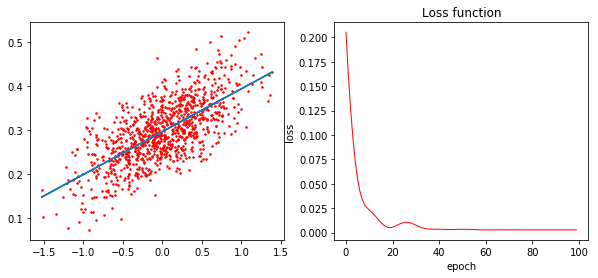

In [15]:
# 결과를 확인한다
print("\n*회귀직선의 방정식 (OLS) : y = %.4f * x +  %.4f" % (sW, sb))
y = sW * inputX + sb

fig = plt.figure(figsize=(10, 4))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)

p1.plot(inputX, inputY, 'ro', markersize=1.5)
p1.plot(inputX, y)

p2.plot(trLoss, color='red', linewidth=1)
p2.set_title("Loss function")
p2.set_xlabel("epoch")
p2.set_ylabel("loss")
plt.show()

앞에서는 error가 엄청 많았다가 20번이후부터 error가 줄어.  
y빼기 값(실제값-예측값)이 여기 오면서 둘이 비슷해졌다는 뜻이야.

data 1000개를 100번 돌림---> update는 10만번 됨? 효율성 별로  
--> reduce_mean->천개를 받아와서 실제값-추정값 제곱, 평균->100번 업뎃 시켜줌  
-- : batch update시켜줘라 error값 전부 합산해서 update ?  --> (일반적으로는 mini batch update시켜줌 얘는 거기서 좀더 나눠주는데 좀더 코딩해줘야해)